In [1]:
import pandas as pd

In [2]:
from rdkit import Chem

In [3]:
from IPython.display import display, SVG

In [4]:
from utils import draw_reaction_smarts

In [5]:
from regioselectivity_check import regioselectivity_check

In [6]:
from site_prediction import ReactionSitePredictor

In [7]:
data = pd.read_csv("data/rxns_with_templates.csv")

In [8]:
site_pred = ReactionSitePredictor("models/LGBM_measured_allData_final_model.txt")

SQM folder is: 
/projects/mai/users/kcjd539_mikhail/LightRegioFilter/2023-02-02-charges-xtb_6.4.0-calculations-to-descriptors


In [9]:
data

,rxn,template,class
0,O=C1CCC(=O)N1Br.Cc1nn(C)c2c1c(C(F)(F)F)cc(=O)n...,O=C1-C-C-C(=O)-N-1-[Br;H0;D1;+0:1].[c:2]:[cH;D...,0.0 Unrecognized
1,O=C1CCC(=O)N1Br.Cc1nn(C)c2c1c(C(F)(F)F)cc(=O)n...,O=C1-C-C-C(=O)-N-1-[Br;H0;D1;+0:1].[c:2]:[cH;D...,0.0 Unrecognized
2,O=C1CCC(=O)N1Br.Cc1nn(C)c2c1c(C(F)(F)F)cc(=O)n...,O=C1-C-C-C(=O)-N-1-[Br;H0;D1;+0:1].[c:2]:[cH;D...,0.0 Unrecognized
3,O=C1CCC(=O)N1Br.Cc1nn(C)c2c1c(C(F)(F)F)cc(=O)n...,O=C1-C-C-C(=O)-N-1-[Br;H0;D1;+0:1].[c:2]:[cH;D...,0.0 Unrecognized
4,O=C1CCC(=O)N1Br.COc1ccc2cnn(C3CCCCC3)c2c1>>COc...,O=C1-C-C-C(=O)-N-1-[Br;H0;D1;+0:1].[#7;a:2]:[c...,0.0 Unrecognized
5,O=C1CCC(=O)N1Br.COc1ccc2cnn(C3CCCCC3)c2c1>>COc...,O=C1-C-C-C(=O)-N-1-[Br;H0;D1;+0:1].[#7;a:2]:[c...,0.0 Unrecognized
6,O=C1CCC(=O)N1Br.Nc1cc(Cl)c(S(N)(=O)=O)cc1S(N)(...,O=C1-C-C-C(=O)-N-1-[Br;H0;D1;+0:1].[c:2]:[cH;D...,0.0 Unrecognized
7,O=C1CCC(=O)N1Br.Nc1cc(Cl)c(S(N)(=O)=O)cc1S(N)(...,O=C1-C-C-C(=O)-N-1-[Br;H0;D1;+0:1].[c:2]:[cH;D...,0.0 Unrecognized
8,O=C1CCC(=O)N1Br.Nc1cc(Cl)c(S(N)(=O)=O)cc1S(N)(...,O=C1-C-C-C(=O)-N-1-[Br;H0;D1;+0:1].[c:2]:[cH;D...,0.0 Unrecognized
9,O=C1CCC(=O)N1Br.Nc1cc(Cl)c(S(N)(=O)=O)cc1S(N)(...,O=C1-C-C-C(=O)-N-1-[Br;H0;D1;+0:1].[c:2]:[cH;D...,0.0 Unrecognized


In [10]:
ix = iter(range(len(data)))

O=C1-C-C-C(=O)-N-1-[Br;H0;D1;+0:1].[c:2]:[cH;D2;+0:3]:[c:4]>>[Br;H0;D1;+0:1]-[c;H0;D3;+0:3](:[c:2]):[c:4]
Cl)n2COCC[Si](C)(C)C)c2ccc(Br)cc21


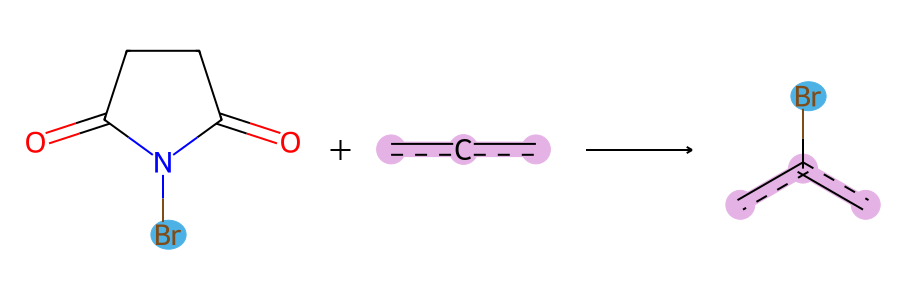

ValueError: ChemicalReactionParserException: a reaction requires at least two > characters

In [56]:
i = next(ix)
rxn = data["rxn"].iloc[i]
templ = data["template"].iloc[i]
print(templ)
print(rxn)
display(draw_reaction_smarts(templ, use_smiles=False))
display(draw_reaction_smarts(rxn, use_smiles=True))
regioselectivity_check(rxn, templ, site_pred)

In [52]:
m = "[#7;a:2]:[c:3]:[c;H0;D3;+0:4](:[#7;a:5])-[Br;H0;D1;+0:1]"
mol = Chem.MolFromSmarts(m)
for a in mol.GetAtoms():
    if a.GetSymbol() == "Br":
        print(a.GetNeighbors()[0].GetIsAromatic())

True


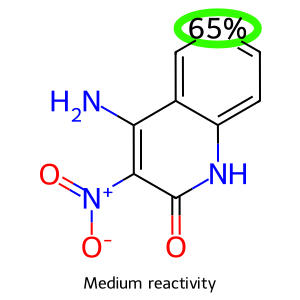

In [115]:
display(SVG('test_mol.svg'))